# Проверка статистических гипотез (на любых существующих данных). Использование критериев Шапиро, Манна-Уитни, Стюдента.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline
from pylab import plot,show,hist
import seaborn as sns

In [3]:
import os
os.chdir("/Users/egorgusev/Анализ данных/Задание 5")

### Демография России 1990-2017

https://www.kaggle.com/dwdkills/russian-demography

In [4]:
df = pd.read_csv('russian_demography.csv', sep=',', encoding='UTF8', decimal='.')

Content

Dataset has 2380 rows and 7 columns. Keys for columns:

"year" - year (1990-2017) \
"region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast \
"npg" - natural population growth by 1000 people. Calculating as the difference between birth rate and death rate\
"birth_rate" - number of births by 1000 people\
"death_rate" - number of deaths by 1000 people\
"gdw" - general demographic weight (how many people of non-woking age account for 100 people of working age). Working age for men 16-60 years, for women 16-55 years\
"urbanization" - % of urban population

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2380 non-null   int64  
 1   region        2380 non-null   object 
 2   npg           2317 non-null   float64
 3   birth_rate    2317 non-null   float64
 4   death_rate    2315 non-null   float64
 5   gdw           2330 non-null   float64
 6   urbanization  2330 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 130.3+ KB


In [6]:
df.dtypes

year              int64
region           object
npg             float64
birth_rate      float64
death_rate      float64
gdw             float64
urbanization    float64
dtype: object

In [7]:
df.shape

(2380, 7)

In [8]:
df.describe(include = 'all')

,year,region,npg,birth_rate,death_rate,gdw,urbanization
count,2380.000000,2380,2317.000000,2317.000000,2315.000000,2330.000000,2330.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN
top,NaN,Novgorod Oblast,NaN,NaN,NaN,NaN,NaN
freq,NaN,28,NaN,NaN,NaN,NaN,NaN
mean,2003.500000,NaN,-2.344022,11.549245,13.901382,68.474013,69.148704
std,8.079445,NaN,6.064389,3.233035,3.499475,10.453587,13.349880
min,1990.000000,NaN,-15.900000,6.200000,3.200000,37.500000,23.630000
25%,1996.750000,NaN,-6.200000,9.300000,12.100000,61.380000,62.792500
50%,2003.500000,NaN,-3.100000,11.000000,14.100000,68.530000,69.575000
75%,2010.250000,NaN,0.700000,13.000000,16.100000,76.895000,77.620000


In [9]:
df.groupby(['region']).mean()

,year,npg,birth_rate,death_rate,gdw,urbanization
region,,,,,,
Altai Krai,2003.5,-3.403571,10.882143,14.342857,70.006071,54.230714
Altai Republic,2003.5,4.853571,17.396429,12.592857,74.703571,26.740000
Amur Oblast,2003.5,-1.550000,12.264286,13.896429,63.717857,66.728929
Arkhangelsk Oblast,2003.5,-3.600000,10.839286,14.489286,66.476786,75.016786
Astrakhan Oblast,2003.5,-0.882143,12.421429,13.278571,69.259643,67.389643
...,...,...,...,...,...,...
Vologda Oblast,2003.5,-4.864286,10.985714,15.860714,71.413214,68.990000
Voronezh Oblast,2003.5,-7.457143,9.196429,16.571429,75.418929,62.778214
Yamalo-Nenets Autonomous Okrug,2003.5,8.796429,14.175000,5.421429,45.226786,83.570714


## Заполняем пропуски в данных

In [10]:
df.isnull().sum()

year             0
region           0
npg             63
birth_rate      63
death_rate      65
gdw             50
urbanization    50
dtype: int64

In [157]:
df['region'].unique()

array(['Republic of Adygea', 'Altai Krai', 'Amur Oblast',
       'Arkhangelsk Oblast', 'Astrakhan Oblast',
       'Republic of Bashkortostan', 'Belgorod Oblast', 'Bryansk Oblast',
       'Republic of Buryatia', 'Vladimir Oblast', 'Volgograd Oblast',
       'Vologda Oblast', 'Voronezh Oblast', 'Republic of Dagestan',
       'Jewish Autonomous Oblast', 'Zabaykalsky Krai', 'Ivanovo Oblast',
       'Republic of Ingushetia', 'Irkutsk Oblast',
       'Kabardino-Balkar Republic', 'Kaliningrad Oblast',
       'Republic of Kalmykia', 'Kaluga Oblast', 'Kamchatka Krai',
       'Karachay-Cherkess Republic', 'Republic of Karelia',
       'Kemerovo Oblast', 'Kirov Oblast', 'Kostroma Oblast',
       'Krasnodar Krai', 'Krasnoyarsk Krai', 'Republic of Crimea',
       'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast',
       'Lipetsk Oblast', 'Magadan Oblast', 'Mari El Republic',
       'Republic of Mordovia', 'Moscow', 'Moscow Oblast',
       'Murmansk Oblast', 'Nenets Autonomous Okrug',
       'Nizh

In [158]:
df[(df['region'] == 'Sevastopol') | (df['region'] == 'Republic of Crimea')].isna().sum()

year             0
region           0
npg             48
birth_rate      48
death_rate      50
gdw             50
urbanization    50
dtype: int64

In [159]:
df[(df['region'] == 'Sevastopol') | (df['region'] == 'Republic of Crimea')]

,year,region,npg,birth_rate,death_rate,gdw,urbanization
31,1990,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
63,1990,Sevastopol,NaN,NaN,NaN,NaN,NaN
116,1991,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
148,1991,Sevastopol,NaN,NaN,NaN,NaN,NaN
201,1992,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
233,1992,Sevastopol,NaN,NaN,NaN,NaN,NaN
286,1993,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
318,1993,Sevastopol,NaN,NaN,NaN,NaN,NaN
371,1994,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
403,1994,Sevastopol,NaN,NaN,NaN,NaN,NaN


In [160]:
df[df['npg'].isna() == True].head(30)

,year,region,npg,birth_rate,death_rate,gdw,urbanization
17,1990,Republic of Ingushetia,NaN,NaN,NaN,94.31,24.84
31,1990,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
63,1990,Sevastopol,NaN,NaN,NaN,NaN,NaN
102,1991,Republic of Ingushetia,NaN,NaN,NaN,96.32,27.80
116,1991,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
148,1991,Sevastopol,NaN,NaN,NaN,NaN,NaN
187,1992,Republic of Ingushetia,NaN,NaN,NaN,97.53,27.06
201,1992,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
233,1992,Sevastopol,NaN,NaN,NaN,NaN,NaN
272,1993,Republic of Ingushetia,NaN,NaN,NaN,97.33,25.91


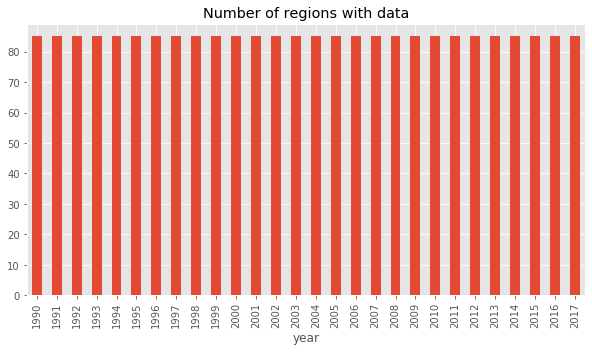

In [11]:
df.groupby(['year']).size().plot(
    kind='bar',
    title='Number of regions with data',
    figsize=(10,5)
)

In [12]:
df = df[(df['region'] != 'Sevastopol') & (df['region'] != 'Republic of Crimea')]

In [13]:
df.isnull().sum()

year             0
region           0
npg             15
birth_rate      15
death_rate      15
gdw              0
urbanization     0
dtype: int64

In [14]:
df[df['npg'].isna() == True].head(15)

,year,region,npg,birth_rate,death_rate,gdw,urbanization
17,1990,Republic of Ingushetia,NaN,NaN,NaN,94.31,24.84
102,1991,Republic of Ingushetia,NaN,NaN,NaN,96.32,27.80
187,1992,Republic of Ingushetia,NaN,NaN,NaN,97.53,27.06
272,1993,Republic of Ingushetia,NaN,NaN,NaN,97.33,25.91
334,1993,Chechen Republic,NaN,NaN,NaN,86.37,44.85
357,1994,Republic of Ingushetia,NaN,NaN,NaN,95.25,25.31
419,1994,Chechen Republic,NaN,NaN,NaN,85.68,44.14
504,1995,Chechen Republic,NaN,NaN,NaN,87.00,38.78
589,1996,Chechen Republic,NaN,NaN,NaN,87.54,38.57
674,1997,Chechen Republic,NaN,NaN,NaN,86.61,38.16


In [15]:
def fill_missing(grp):
    res = grp.set_index('year')\
    .interpolate(method='linear',limit=5)\
    .fillna(method='ffill')\
    .fillna(method='bfill')
    del res['region']
    return res

In [16]:
# Group by region name and fill missing
df = df.groupby(['region']).apply(
    lambda grp: fill_missing(grp)
)
df = df.reset_index()

In [17]:
df

,region,year,npg,birth_rate,death_rate,gdw,urbanization
0,Altai Krai,1990,1.8,12.9,11.1,80.24,58.07
1,Altai Krai,1991,0.4,11.7,11.3,79.95,58.08
2,Altai Krai,1992,-1.4,10.4,11.8,79.55,55.21
3,Altai Krai,1993,-4.9,9.1,14.0,79.16,52.26
4,Altai Krai,1994,-5.9,9.2,15.1,78.21,52.06
...,...,...,...,...,...,...,...
2319,Zabaykalsky Krai,2013,3.4,15.9,12.5,65.13,66.80
2320,Zabaykalsky Krai,2014,3.5,16.0,12.5,67.69,67.10
2321,Zabaykalsky Krai,2015,2.5,15.4,12.9,70.13,67.40
2322,Zabaykalsky Krai,2016,2.3,14.6,12.3,72.64,67.70


In [18]:
df.describe(include = 'all')

,region,year,npg,birth_rate,death_rate,gdw,urbanization
count,2324,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
unique,83,NaN,NaN,NaN,NaN,NaN,NaN
top,Novgorod Oblast,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2003.500000,-2.226396,11.620001,13.855261,68.448472,69.142074
std,NaN,8.079486,6.231386,3.356434,3.536058,10.453961,13.324131
min,NaN,1990.000000,-15.900000,6.200000,3.200000,37.500000,23.630000
25%,NaN,1996.750000,-6.200000,9.300000,12.000000,61.370000,62.800000
50%,NaN,2003.500000,-3.100000,11.000000,14.100000,68.505000,69.575000
75%,NaN,2010.250000,0.800000,13.100000,16.100000,76.842500,77.605000


In [19]:
df.isnull().sum()

region          0
year            0
npg             0
birth_rate      0
death_rate      0
gdw             0
urbanization    0
dtype: int64

In [20]:
df.describe(include = 'all')

,region,year,npg,birth_rate,death_rate,gdw,urbanization
count,2324,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
unique,83,NaN,NaN,NaN,NaN,NaN,NaN
top,Novgorod Oblast,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2003.500000,-2.226396,11.620001,13.855261,68.448472,69.142074
std,NaN,8.079486,6.231386,3.356434,3.536058,10.453961,13.324131
min,NaN,1990.000000,-15.900000,6.200000,3.200000,37.500000,23.630000
25%,NaN,1996.750000,-6.200000,9.300000,12.000000,61.370000,62.800000
50%,NaN,2003.500000,-3.100000,11.000000,14.100000,68.505000,69.575000
75%,NaN,2010.250000,0.800000,13.100000,16.100000,76.842500,77.605000


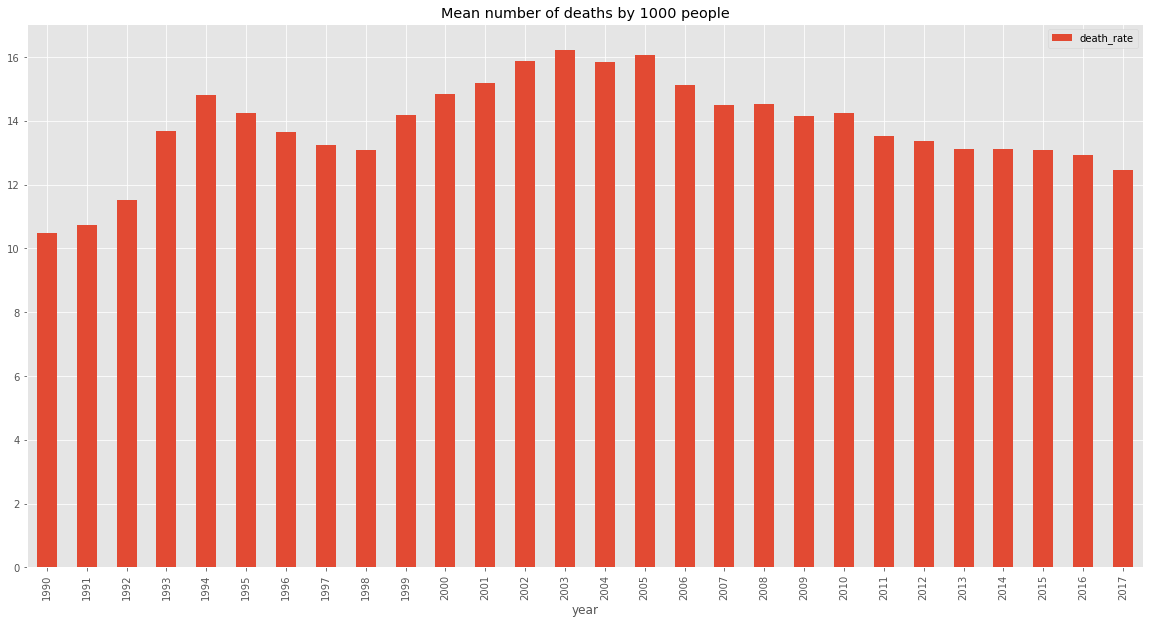

In [21]:
df.groupby(['year']).agg({'death_rate':'mean'}).plot.bar(figsize=(20,10), title='Mean number of deaths by 1000 people')
plt.show()

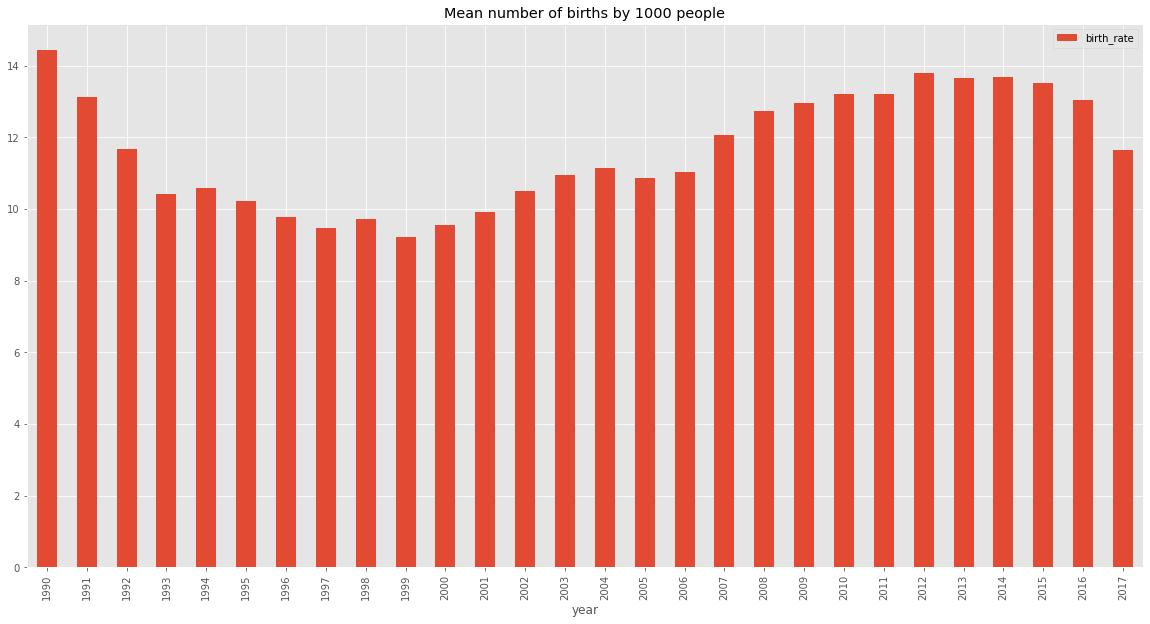

In [24]:
df.groupby(['year']).agg({'birth_rate':'mean'}).plot.bar(figsize=(20,10), title='Mean number of births by 1000 people')
plt.show()

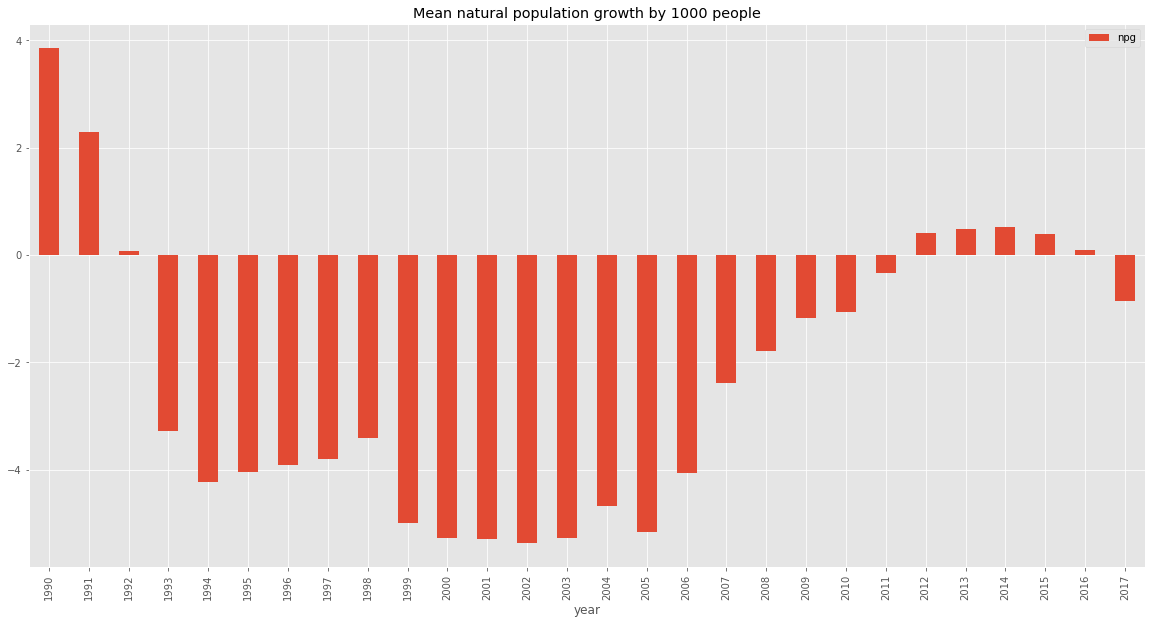

In [25]:
df.groupby(['year']).agg({'npg':'mean'}).plot.bar(figsize=(20,10), title='Mean natural population growth by 1000 people')
plt.show()

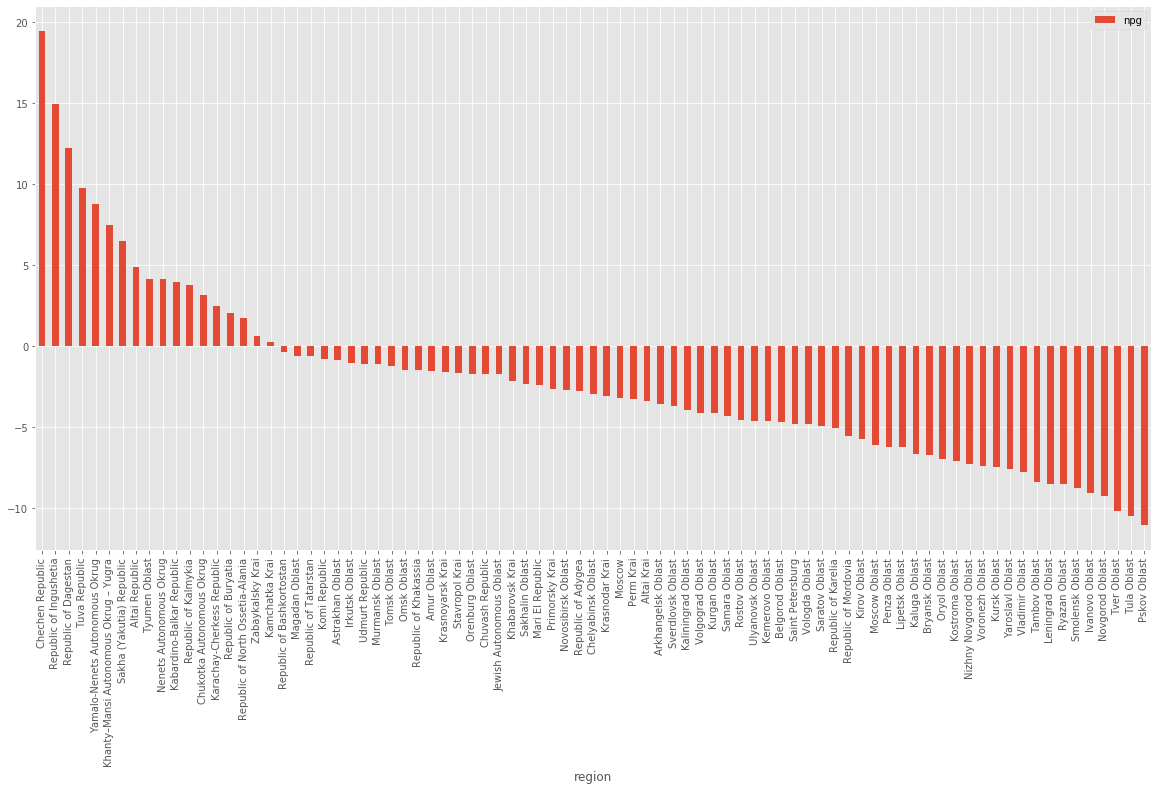

In [209]:
df.groupby(['region']).agg({'npg':'mean'}).sort_values(by='npg',ascending=False).plot.bar(figsize=(20,10))

In [26]:
pd.concat([df[df['urbanization'] < 100].groupby(['year']).agg({'urbanization':'mean'}), df.groupby(['year']).agg({'urbanization':'mean'})], axis = 1)

,urbanization,urbanization
year,,
1990,68.252289,68.999294
1991,68.526386,69.266941
1992,68.472289,69.214118
1993,67.915663,68.670588
1994,67.840602,68.597294
1995,67.903855,68.659059
1996,68.104217,68.854706
1997,68.124217,68.874235
1998,68.194217,68.942588


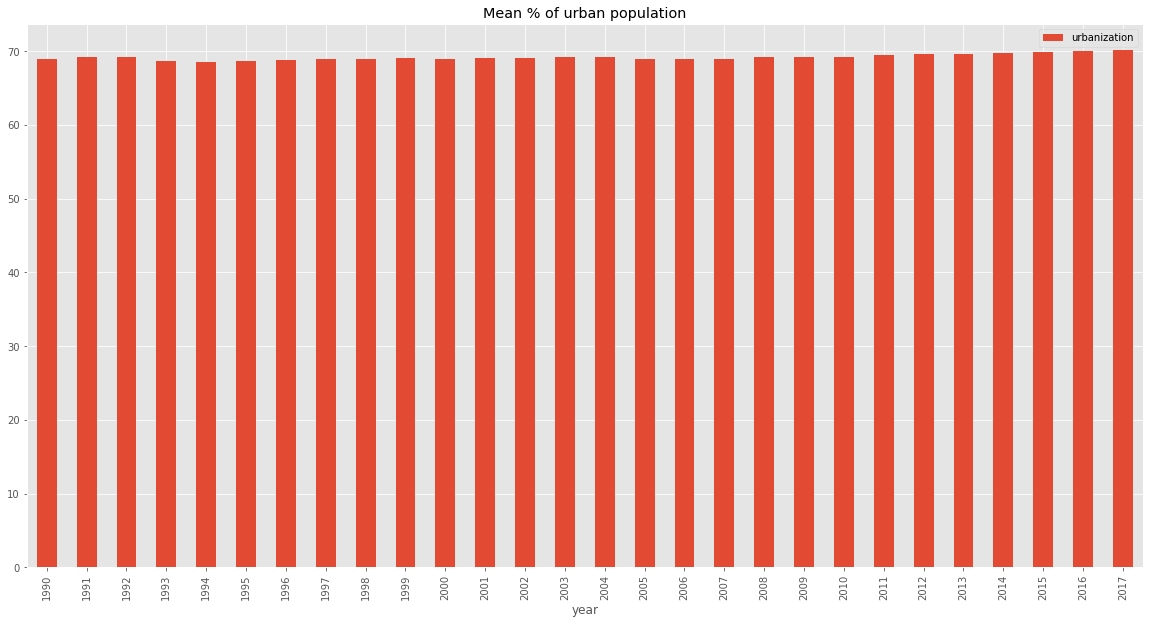

In [27]:
df.groupby(['year']).agg({'urbanization':'mean'}).plot.bar(figsize=(20,10), title = 'Mean % of urban population')
plt.show()

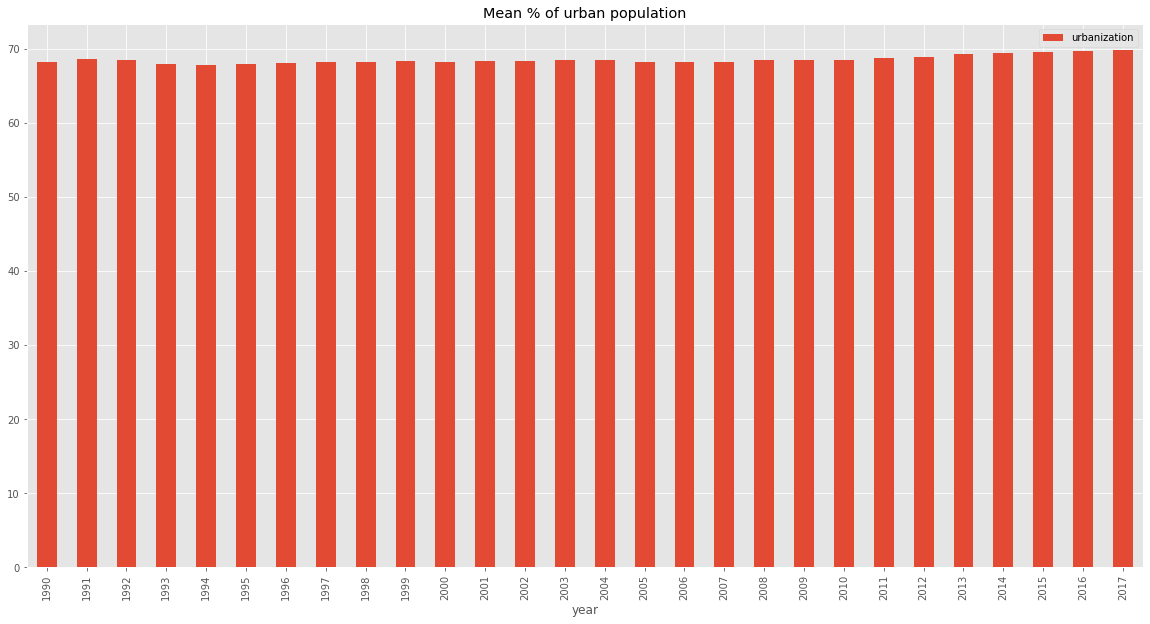

In [28]:
df[df['urbanization'] < 100].groupby(['year']).agg({'urbanization':'mean'}).plot.bar(figsize=(20,10), title = 'Mean % of urban population')
plt.show()

In [51]:
df[df['urbanization'] == 100]

,region,year,npg,birth_rate,death_rate,gdw,urbanization
924,Moscow,1990,-2.2,10.6,12.8,71.52,100.0
925,Moscow,1991,-3.7,9.1,12.8,70.74,100.0
926,Moscow,1992,-5.9,7.6,13.5,70.37,100.0
927,Moscow,1993,-9.2,6.9,16.1,70.65,100.0
928,Moscow,1994,-9.5,7.4,16.9,69.93,100.0
929,Moscow,1995,-8.5,7.5,16.0,69.01,100.0
930,Moscow,1996,-6.6,7.3,13.9,66.97,100.0
931,Moscow,1997,-6.0,7.1,13.1,64.98,100.0
932,Moscow,1998,-6.0,7.0,13.0,62.93,100.0
933,Moscow,1999,-6.2,6.8,13.0,60.22,100.0


In [62]:
df.sort_values(by = 'urbanization').tail(60)

,region,year,npg,birth_rate,death_rate,gdw,urbanization
894,Magadan Oblast,2016,-0.2,11.2,11.4,63.61,95.5
890,Magadan Oblast,2012,-0.1,12.6,12.7,53.17,95.7
895,Magadan Oblast,2017,-0.5,10.9,11.4,65.47,95.7
891,Magadan Oblast,2013,0.7,12.6,11.9,55.82,95.8
949,Moscow,2015,1.7,11.6,9.9,65.79,98.8
950,Moscow,2016,1.8,11.8,10.0,68.44,98.8
951,Moscow,2017,1.1,10.7,9.6,70.86,98.8
948,Moscow,2014,1.6,11.3,9.7,63.49,98.9
947,Moscow,2013,1.7,11.3,9.6,61.44,98.9
1720,Saint Petersburg,2002,-8.4,8.0,16.4,60.62,100.0


In [63]:
urban1999 = df[(df['year'] == 1999) & (df['urbanization'] < 98) ]['urbanization']

In [64]:
urban2017 = df[(df['year'] == 2017) & (df['urbanization'] < 98) ]['urbanization']

In [65]:
urban1999.name, urban2017.name = 'Urbanization 1999', 'Urbanization 2017'

In [66]:
def two_histograms(x, y):
    x.hist(alpha=0.5)
    y.hist(alpha=0.5)
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

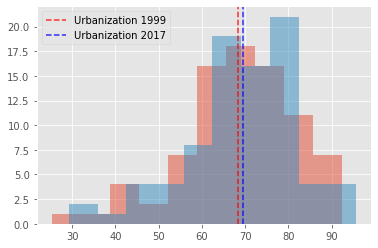

In [67]:
two_histograms(urban1999, urban2017)

In [68]:
res = stats.shapiro(urban1999)
print('p-value: ', res[1])

p-value:  0.04632085934281349


In [69]:
res = stats.shapiro(urban2017)
print('p-value: ', res[1])

p-value:  0.008265982381999493


In [70]:
res = stats.fligner(urban1999, urban2017)
print('p-value: ', res[1])

p-value:  0.8130890910525013


In [71]:
len(urban1999)

83

In [72]:
res = stats.ttest_rel(urban1999, urban2017)
print('p-value: ', res[1])

p-value:  0.0015039573675889996


In [73]:
birth2000 = df[df['year'] == 2000]['birth_rate']
birth2000

10       9.3
38      14.3
66      10.2
94       8.8
122      9.9
        ... 
2250     8.8
2278     7.6
2306    11.7
2334     7.3
2362    11.8
Name: birth_rate, Length: 85, dtype: float64

In [74]:
birth2017 = df[df['year'] == 2017]['birth_rate']
birth2017

27      10.8
55      15.8
83      11.8
111     10.5
139     12.1
        ... 
2267    11.4
2295     9.6
2323    14.0
2351    10.5
2379    13.4
Name: birth_rate, Length: 85, dtype: float64

In [75]:
birth2000.name, birth2017.name = 'Birth 2000', 'Birth 2017'

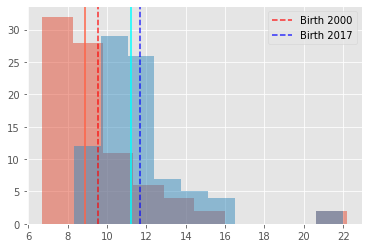

In [89]:
two_histograms(birth2000, birth2017)
plt.axvline(birth2000.median(), color='tomato', alpha=1),
plt.axvline(birth2017.median(), color='cyan', alpha=1)

In [90]:
res = stats.wilcoxon(birth2000, birth2017)
print('p-value: ', res[1])

p-value:  1.0278666567470902e-13


In [43]:
death1990 = df[df['year'] == 1990]['death_rate']
death1990

0       11.1
28      10.9
56       8.6
84       9.8
112     10.4
        ... 
2240    12.0
2268    13.9
2296     3.3
2324    13.2
2352     9.2
Name: death_rate, Length: 85, dtype: float64

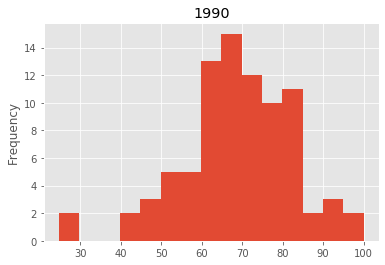

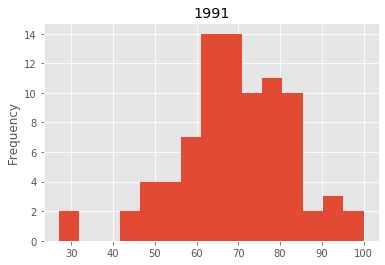

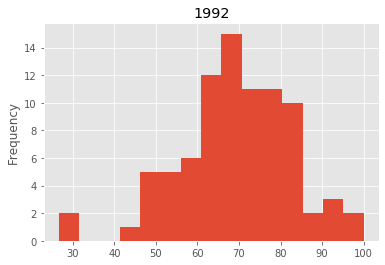

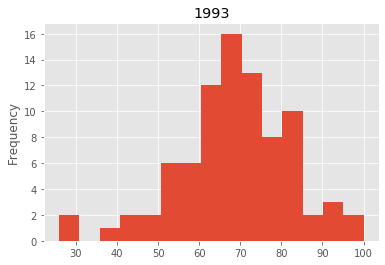

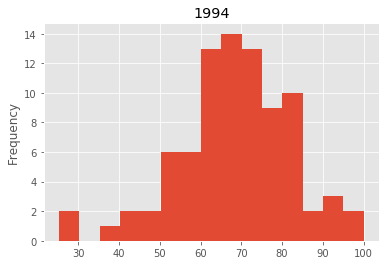

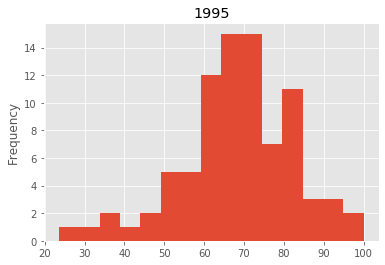

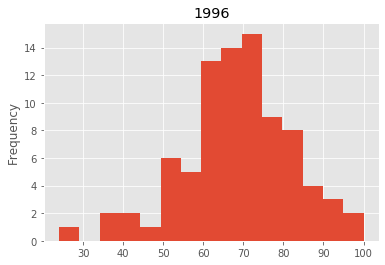

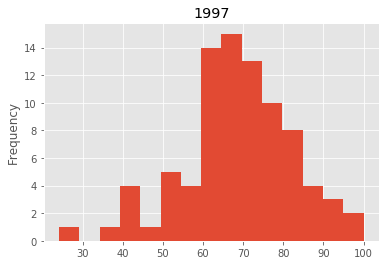

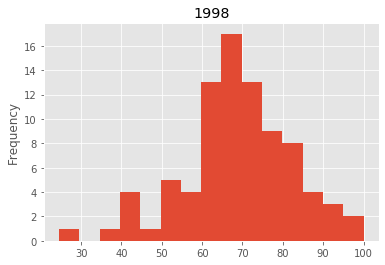

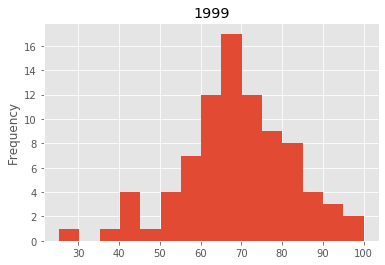

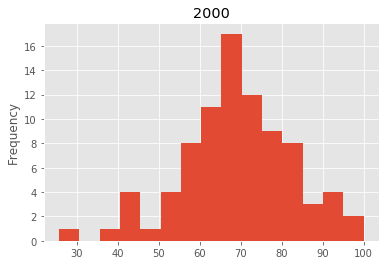

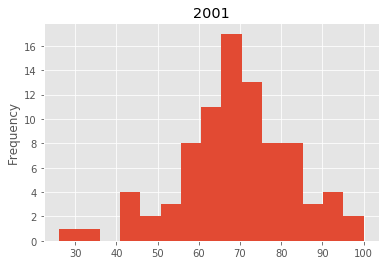

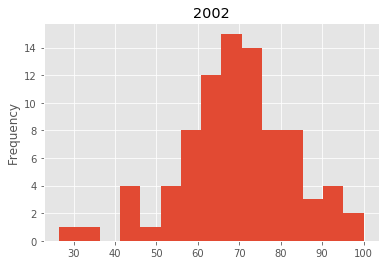

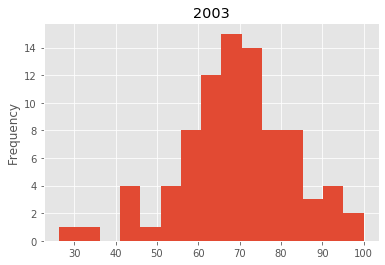

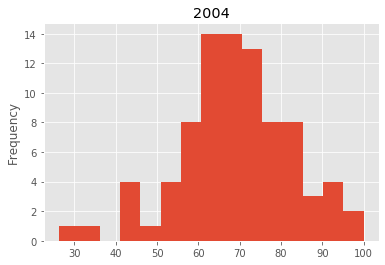

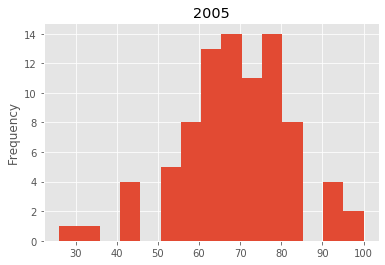

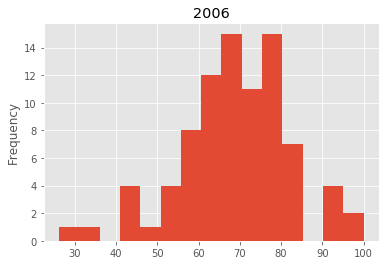

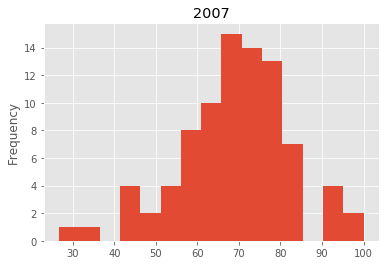

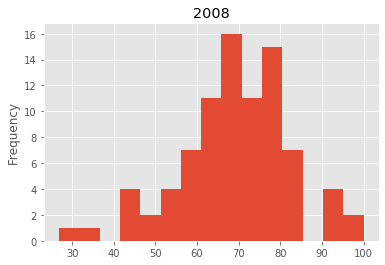

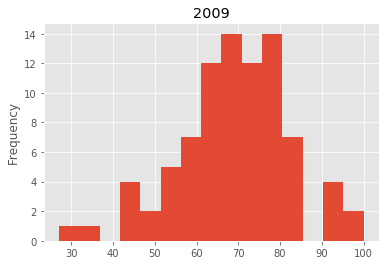

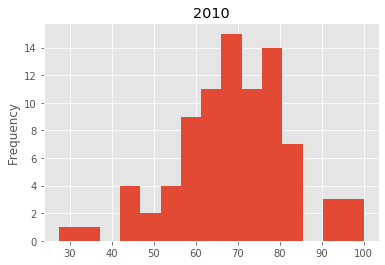

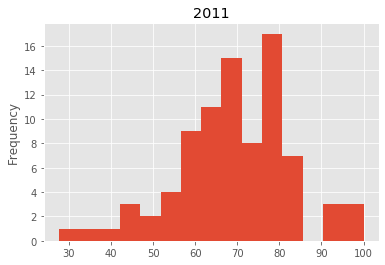

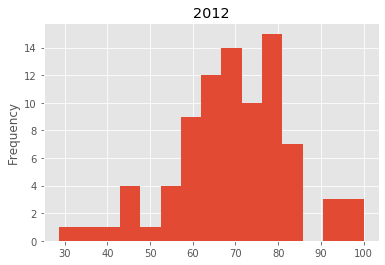

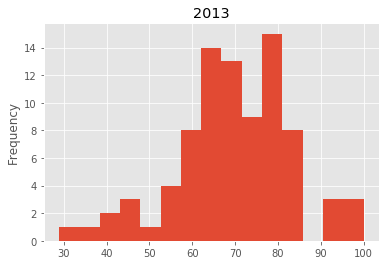

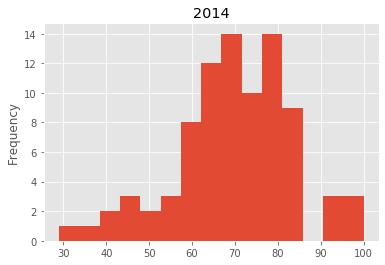

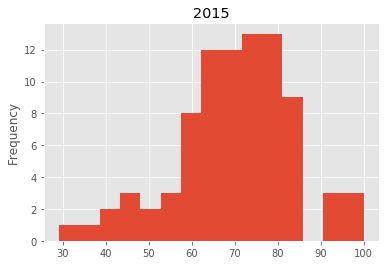

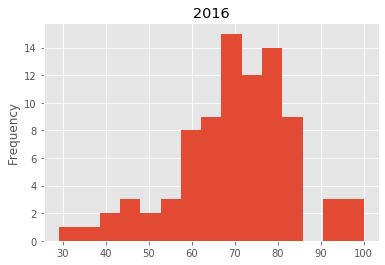

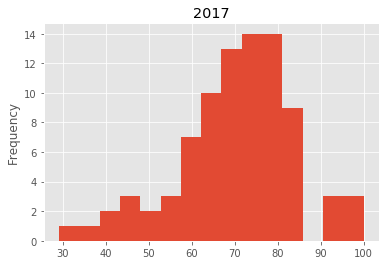

In [44]:
for i in range(1990,2018):
    df[df['year'] == i]['urbanization'].plot.hist(bins = 15, title = i)
    plt.show()

In [166]:
spb = df[df['region'] == 'Saint Petersburg']

In [169]:
spb

,year,region,npg,birth_rate,death_rate,gdw,urbanization
59,1990,Saint Petersburg,-1.4,10.9,12.3,68.20,100.0
144,1991,Saint Petersburg,-3.3,9.3,12.6,68.94,100.0
229,1992,Saint Petersburg,-5.9,7.6,13.5,69.65,100.0
314,1993,Saint Petersburg,-10.8,6.6,17.4,70.97,100.0
399,1994,Saint Petersburg,-10.1,7.1,17.2,71.31,100.0
484,1995,Saint Petersburg,-8.9,7.0,15.9,71.22,100.0
569,1996,Saint Petersburg,-7.5,6.6,14.1,70.65,100.0
654,1997,Saint Petersburg,-6.7,6.6,13.3,69.61,100.0
739,1998,Saint Petersburg,-7.1,6.5,13.6,68.53,100.0
824,1999,Saint Petersburg,-9.0,6.2,15.2,66.42,100.0


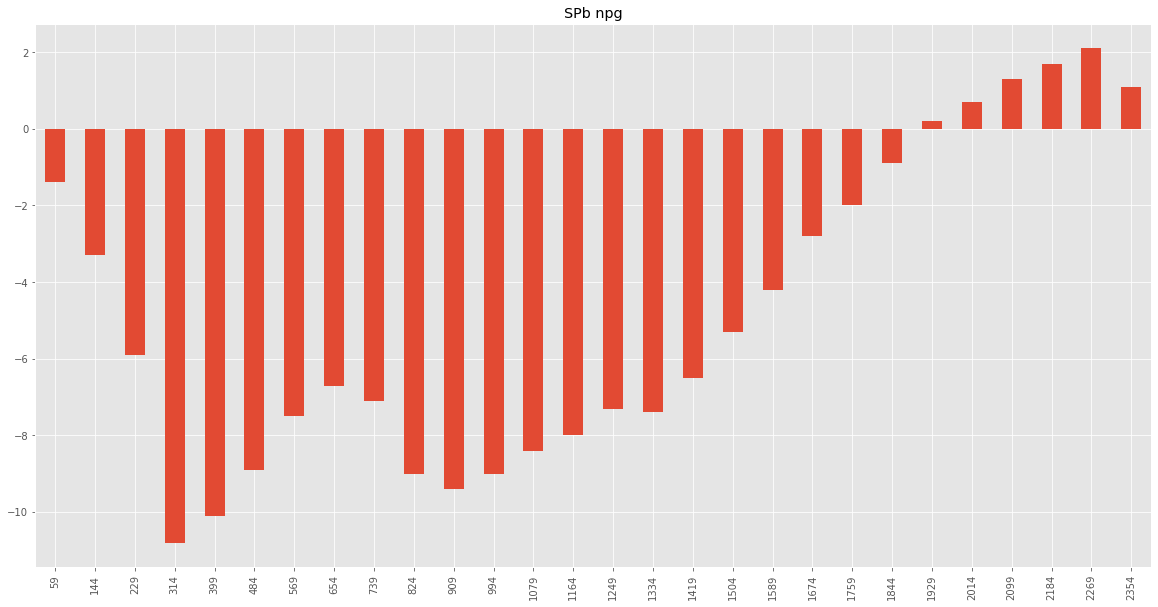

In [171]:
spb['npg'].plot.bar(figsize=(20,10), title = 'SPb npg')
plt.show()

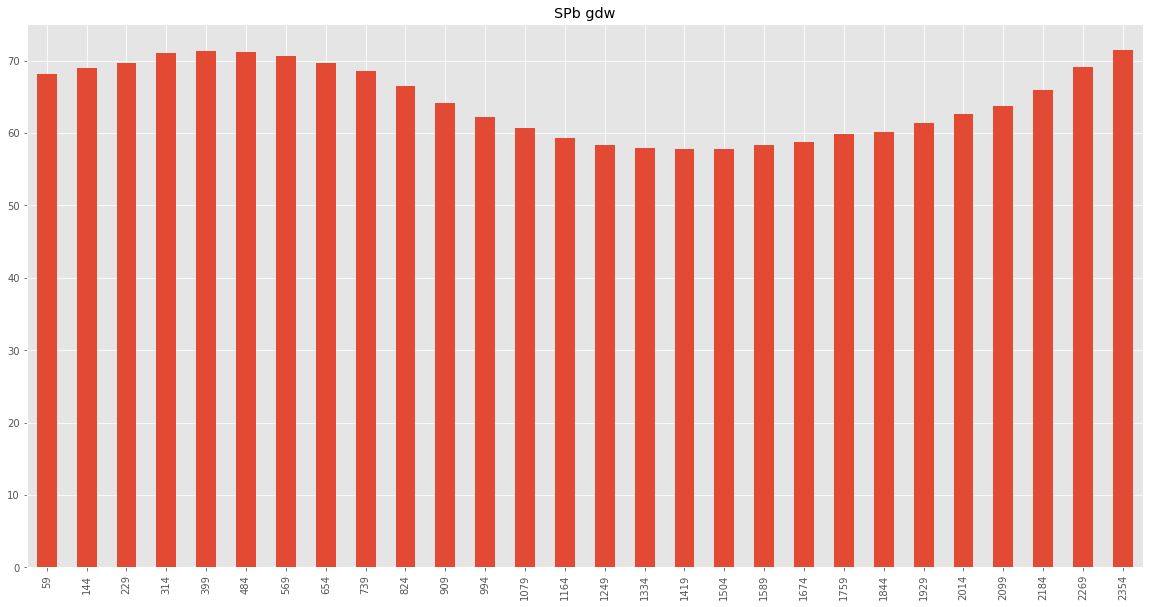

In [173]:
spb['gdw'].plot.bar(figsize=(20,10), title = 'SPb gdw')
plt.show()

In [177]:
lenobl = df[df['region'] == 'Leningrad Oblast'] 

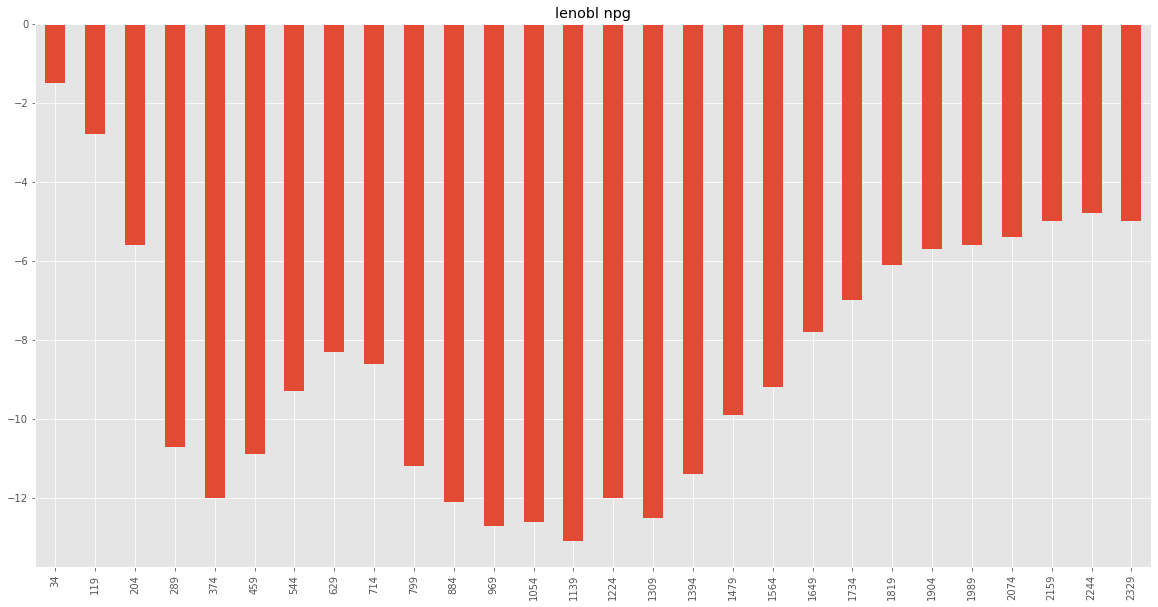

In [180]:
lenobl['npg'].plot.bar(figsize=(20,10), title = 'lenobl npg')
plt.show()

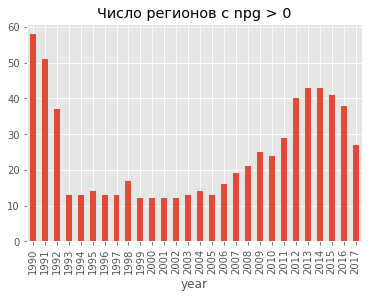

In [193]:
df[(df['npg'] > 0)].groupby('year')['npg'].count().plot.bar(title = 'Число регионов с npg > 0')

In [202]:
df.groupby('region')['urbanization'].median().sort_values()

region
Altai Republic                            26.600
Chechen Republic                          35.350
Republic of Ingushetia                    41.910
Republic of Dagestan                      43.645
Karachay-Cherkess Republic                43.965
                                          ...   
Khanty–Mansi Autonomous Okrug – Yugra     91.450
Murmansk Oblast                           92.275
Magadan Oblast                            92.850
Moscow                                   100.000
Saint Petersburg                         100.000
Name: urbanization, Length: 83, dtype: float64

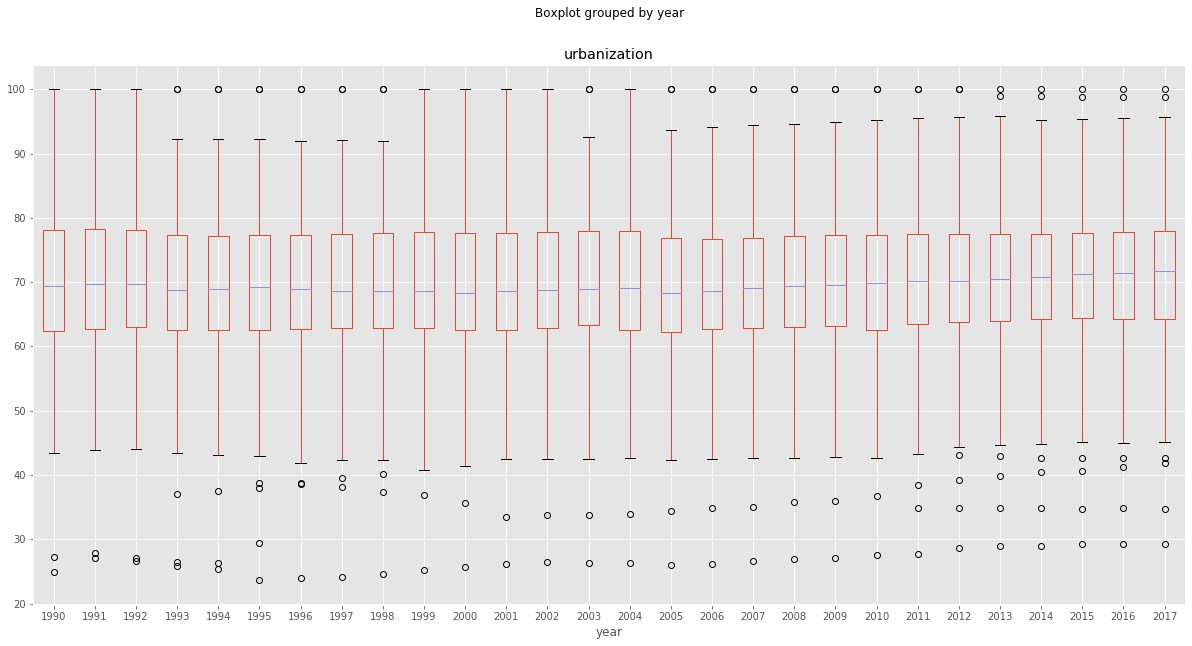

In [213]:
df.boxplot(figsize=(20,10), column='urbanization', by = 'year')
plt.show()

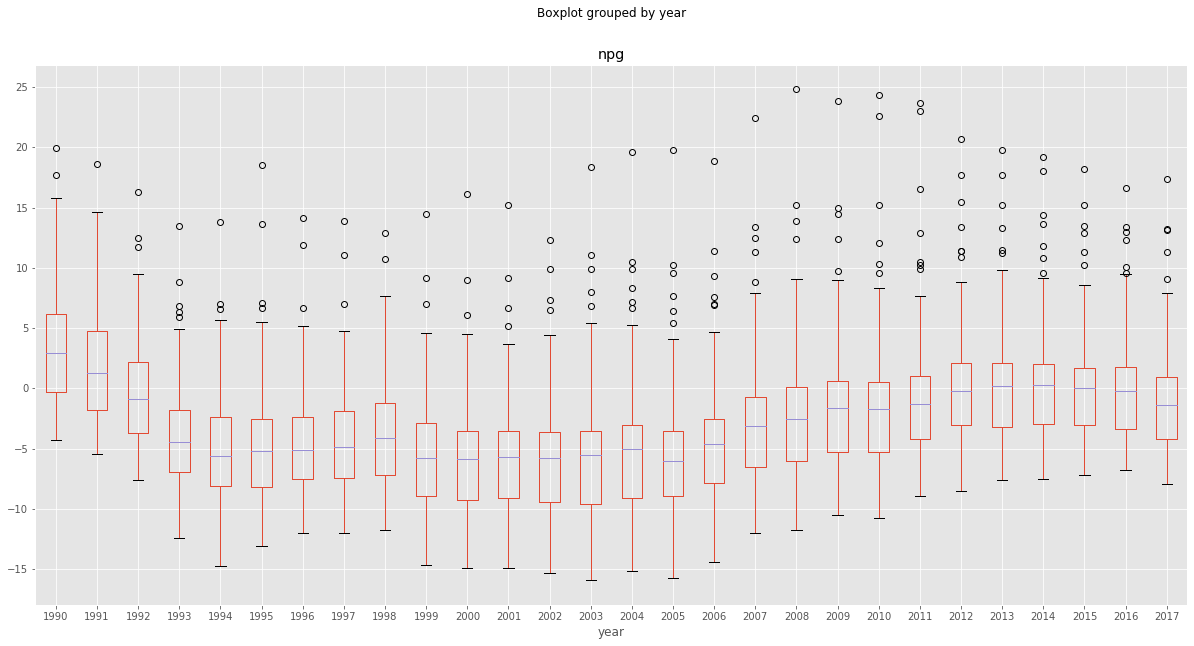

In [214]:
df.boxplot(figsize=(20,10), column='npg', by = 'year')
plt.show()

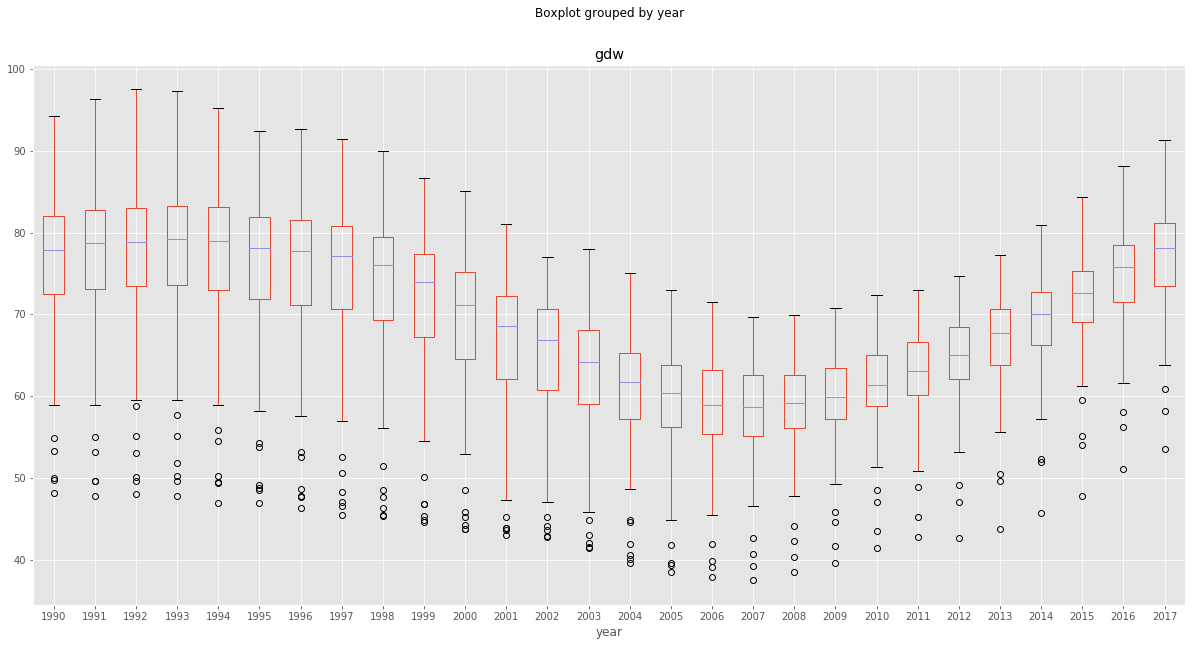

In [215]:
df.boxplot(figsize=(20,10), column='gdw', by = 'year')
plt.show()